In [1]:
#AB TESTİ

import pandas as pd

A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
                 25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,282,28,37,37,30,32,31,31,27,
                 32,33,33,33,31,32,33,26,32,33,29])



In [2]:
A

,0
0,30
1,27
2,21
3,27
4,29
5,30
6,20
7,20
8,27
9,32


In [3]:
B

,0
0,37
1,39
2,31
3,31
4,34
5,38
6,30
7,36
8,29
9,28


In [4]:
#İki ayrı veri setini birleştirmek için
A_B = pd.concat([A,B],axis = 1)

In [5]:
A_B.head()

,0,0
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [6]:
A_B

,0,0
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34
5,30,38
6,20,30
7,20,36
8,27,29
9,32,28


In [7]:
#Sütun isimlerini değiştirmek için
A_B.columns = ["A","B"]
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [8]:
import numpy as np

GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
GRUP_A

,0
0,A
1,A
2,A
3,A
4,A
5,A
6,A
7,A
8,A
9,A


In [10]:
import numpy as np

A_ = pd.concat([A,GRUP_A],axis = 1)
A_.head()

,0,0
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [11]:
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"

GRUP_B

,0
0,B
1,B
2,B
3,B
4,B
5,B
6,B
7,B
8,B
9,B


In [12]:
B_ = pd.concat([B,GRUP_B],axis = 1)
B_.head()

,0,0
0,37,B
1,39,B
2,31,B
3,31,B
4,34,B


In [13]:
AB = pd.concat([A_,B_])
AB


,0,0
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A
5,30,A
6,20,A
7,20,A
8,27,A
9,32,A


In [14]:
AB.columns = ["GELIR","GRUP"]
AB.head()

,GELIR,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


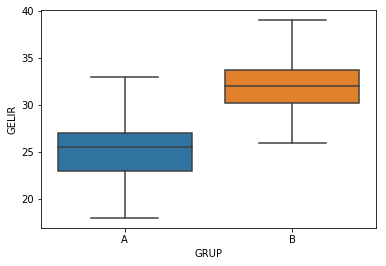

In [17]:
import seaborn as sns

sns.boxplot(x = "GRUP",y="GELIR",data=AB,showfliers=False);

In [18]:
#VARSAYIM KONTROLÜ:

#1) Normallik Testi(Shapiro Testi):
from scipy.stats import shapiro

shapiro(A_B.A)


(0.9789242148399353, 0.7962799668312073)

In [19]:
#A GRUBU İÇİN :H0 hipotezini reddedemiyoruz.Bu yüzden örneklemimiz normal dağılmıştır.

In [21]:
shapiro(A_B.B)
#returns: (test-statistics,p-value)

(0.2359236478805542, 2.1147431028545327e-11)

In [22]:
#2) Varyans Homojenliği(levene testi)
from scipy.stats import levene

levene(A_B.A,A_B.B)

LeveneResult(statistic=0.8223582869069082, pvalue=0.36824379478827984)

In [24]:
# p-value > 0.05 Varyanslar homojendir

In [28]:
import scipy.stats as stats

stats.ttest_ind(A_B["A"],A_B["B"],equal_var=True)

Ttest_indResult(statistic=-1.7933120484919471, pvalue=0.07813713918783105)